<a href="https://colab.research.google.com/github/pwy7fv/the_bootstrap/blob/main/assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [ ]:
! git clone https://www.github.com/pwy7fv/the_bootstrap

Cloning into 'the_bootstrap'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 29 (delta 2), reused 1 (delta 1), pack-reused 22 (from 1)
Receiving objects: 100% (29/29), 1.95 MiB | 6.60 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Q1.**

1. Imagine rolling two dice, 𝑑1 and 𝑑2. Let 𝑅𝑚𝑖𝑛 be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of 𝑅𝑚𝑖𝑛? Plot the probability and cumulative distribution functions for 𝑅𝑚𝑖𝑛. Compute this by hand and simulate it using the law of large numbers.

In [ ]:
pdf = np.zeros(6)
faces = np.array([1,2,3,4,5,6])

for d1 in range(6):
    for d2 in range(6):
        min_ds = np.min([faces[d1], faces[d2]])
        pdf[min_ds - 1] += 1

pdf = pdf / np.sum(pdf)
cdf = np.cumsum(pdf)


In [ ]:
faces = np.array([1,2,3,4,5,6])
N = 150
die1 = np.random.choice(faces, size=N)
die2 = np.random.choice(faces, size=N)
roll = [min([die1[i],+die2[i]]) for i in range(N)]
ecdf = np.zeros(6)

for i in range(6):
    ecdf[i] = (1/N)*np.sum( roll <= faces[i] )

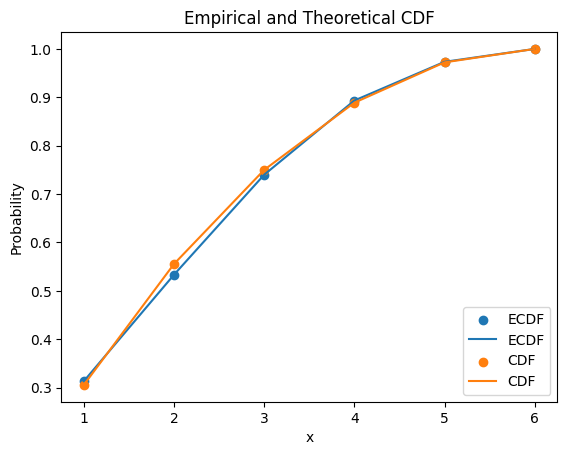

In [ ]:
plt.scatter(faces,ecdf,label='ECDF')
plt.plot(faces,ecdf,label='ECDF')
plt.scatter(faces,cdf,label='CDF')
plt.plot(faces,cdf,label='CDF')
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend(loc='lower right')
plt.title('Empirical and Theoretical CDF')
plt.show()

2. Imagine rolling three dice, 𝑑1, 𝑑2, and 𝑑3. Let 𝑅𝑚𝑒𝑑 be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of 𝑅𝑚𝑒𝑑? Plot the probability and cumulative distribution functions for 𝑅𝑚𝑒𝑑. I recommend using simulations and the law of large numbers.

3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?